<a href="https://colab.research.google.com/github/ggiogoncalves/ggiogoncalves/blob/main/Brazilian_Unemployment_Rate_Percentage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#fuzzy System for Brazilian Unemployment Rate in 2021 (1st trimester)

In [ ]:
# 1° Instalar a biblioteca necessária
!pip install networkx==2.3
!pip install simpful

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=6cbf71c989026b1d8a8482a1bea4d8d3a8835db88bc599019090f4057c20b8d5
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importar os pacotes 
from simpful import *

In [ ]:
# Um sistema de inferência fuzzy Larsen para a "Brazilian Unemployment Rate "
#Criar um objeto de Sistema Fuzzy 
FS = FuzzySystem( )

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



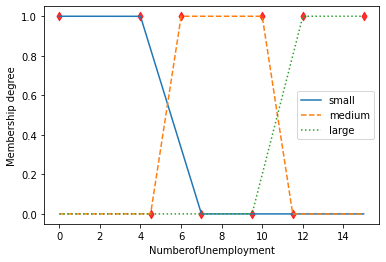

In [ ]:
# Definir os conjuntos Fuzzy de entrada e as variávies  linguísticas
NoU_1 = FuzzySet( points = [[0,1],[4,1],[7,0]], term = "small" )
NoU_2 = FuzzySet( points = [[4.5,0],[6,1],[10,1],[11.5,0]], term = "medium" )
NoU_3 = FuzzySet( points = [[9.5,0],[12,1],[15,1]], term = "large" )
NoU = LinguisticVariable( [NoU_1, NoU_2, NoU_3], concept = "NumberofUnemployment", universe_of_discourse = [0, 15 ] )
FS.add_linguistic_variable ( "NumberofUnemployment", LinguisticVariable( [NoU_1, NoU_2, NoU_3], 
                                                        concept = "Number of Unemployment in Brazil", universe_of_discourse = [0, 15 ] ) )

NoU.plot()

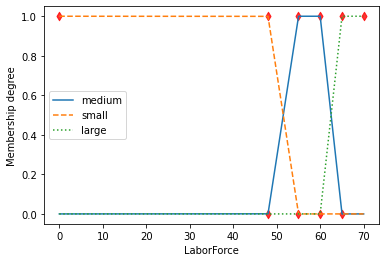

In [ ]:
LF_2 = FuzzySet( points = [[0,1],[48,1],[55,0]], term = "small" )
LF_1 = FuzzySet( points = [[48,0],[55,1],[60,1],[65,0]], term = "medium" )
LF_3 = FuzzySet( points = [[60,0],[65,1],[70,1]], term = "large" )
LF = LinguisticVariable( [LF_1, LF_2, LF_3], concept = "LaborForce", universe_of_discourse = [0, 70 ] )
FS.add_linguistic_variable( "LaborForce", LinguisticVariable( [LF_1, LF_2, LF_3], 
                                                     concept = "Labor Force in Brazil", universe_of_discourse = [0, 70 ] ) )
LF.plot()

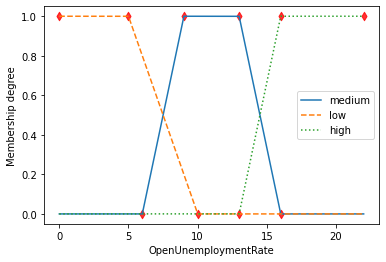

In [ ]:
OuR_2 = FuzzySet( points = [[0,1],[5,1],[10,0]], term = "low" )
OuR_1 = FuzzySet( points = [[6,0],[9,1],[13,1],[16,0]], term = "medium" )
OuR_3 = FuzzySet( points = [[13,0],[16,1],[22,1]], term = "high" )
OuR = LinguisticVariable( [OuR_1, OuR_2, OuR_3], concept = "OpenUnemploymentRate", universe_of_discourse = [0, 22 ] )
FS.add_linguistic_variable( "OpenUnemploymentRate", LinguisticVariable( [OuR_1, OuR_2, OuR_3], 
                                                             concept = "Open Unemployment Rate in Brazil", 
                                                             universe_of_discourse = [0, 22 ] ) )
OuR.plot()

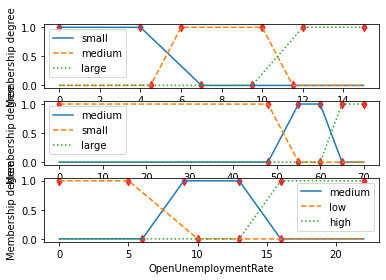

In [ ]:
#Plotando os Conjuntos Fuzzy dos antecedentes e consequentes
#%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax  = plt.subplots(3,1)
NoU.draw(ax = ax[0])
LF.draw(ax = ax[1])
OuR.draw(ax = ax[2])

In [ ]:
#Definir as regras Fuzzy para "Unemployment"

R1 = "IF (NumberofUnemployment IS small) AND (LaborForce IS medium) THEN (OpenUnemploymentRate IS medium)"
R2 = "IF (NumberofUnemployment IS medium) AND (LaborForce IS small) THEN (OpenUnemploymentRate IS high)"
R3 = "IF (NumberofUnemployment IS large) AND (LaborForce IS small) THEN (OpenUnemploymentRate IS high)"
R4 = "IF (NumberofUnemployment IS large) AND (LaborForce IS medium) THEN (OpenUnemploymentRate IS high)"
R5 = "IF (NumberofUnemployment IS medium) AND (LaborForce IS medium) THEN (OpenUnemploymentRate IS high)"
R6 = "IF (NumberofUnemployment IS small) AND (LaborForce IS large) THEN (OpenUnemploymentRate IS medium)"
R7 = "IF (NumberofUnemployment IS medium) AND (LaborForce IS large) THEN (OpenUnemploymentRate IS medium)"
R8 = "IF (NumberofUnemployment IS small) AND (LaborForce IS small) THEN (OpenUnemploymentRate IS medium)"
R9 = "IF (NumberofUnemployment IS large) AND (LaborForce IS large) THEN (OpenUnemploymentRate IS high)"

FS.add_rules([R1,R2,R3,R4,R5,R6,R7,R8,R9])


In [ ]:
#Definir os valores dos antecedentes
FS.set_variable("NumberofUnemployment", 6 )
FS.set_variable("LaborForce", 62 )

In [ ]:
#Executar a inferência de Larsen e imprimir a sáida
print(FS.Mamdani_inference( ))

{'OpenUnemploymentRate': 15.075931359371683}


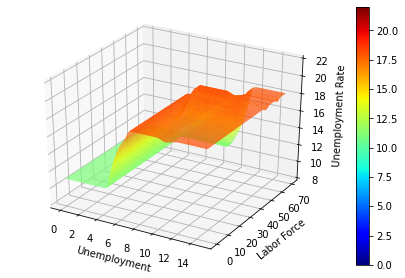

In [ ]:
import matplotlib.pylab as plt
from numpy import linspace, array
# Plotando a superfície
xs = []
ys = []
zs = []
DIVs = 90
for x in linspace(0, 15, DIVs):
    for y in linspace(0, 70, DIVs):
        FS.set_variable("NumberofUnemployment", x)
        FS.set_variable("LaborForce", y)
        rate = FS.inference()['OpenUnemploymentRate']
        xs.append(x)
        ys.append(y)
        zs.append(rate)
xs = array(xs)
ys = array(ys)
zs = array(zs)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

xx, yy = plt.meshgrid(xs,ys)

surf = ax.plot_trisurf(xs,ys,zs, vmin = 0, vmax = 22, cmap='jet')
fig.colorbar(surf)
ax.set_xlabel("Unemployment")
ax.set_ylabel("Labor Force")
ax.set_zlabel("Unemployment Rate")
ax.set_title(" ", pad = 10)
ax.set_zlim(8, 22)
plt.tight_layout()
plt.show()